In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.model_selection import train_test_split
sns.set()
import pylab


In [2]:
df=pd.read_csv("E:\\datasets\\December Sleep data - Sheet1.csv")

In [3]:
df

,DECEMBER,DATE,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Wednesday,12/01/2021,91.0,7:33:00,23.00%,19.00%,98.00%,10:56pm - 7:20am
2,Thursday,12/02/2021,81.0,7:17:00,16.00%,13.00%,94.00%,10:45pm - 6:58am
3,Friday,12/03/2021,80.0,7:17:00,15.00%,17.00%,78.00%,10:51pm - 7:02am
4,Saturday,12/04/2021,85.0,8:23:00,20.00%,15.00%,58.00%,9:53pm - 7:17am
5,Sunday,12/05/2021,82.0,7:19:00,20.00%,12.00%,79.00%,11:54pm - 8:16am
6,Monday,12/06/2021,80.0,7:18:00,18.00%,16.00%,56.00%,11:28pm - 7:47am
7,Tuesday,12/07/2021,89.0,8:02:00,21.00%,11.00%,94.00%,10:09pm - 7:18am
8,Wednesday,12/08/2021,85.0,6:47:00,22.00%,16.00%,94.00%,11:40pm - 7:33
9,Thursday,12/09/2021,85.0,7:32:00,12.00%,14.00%,96.00%,10:47pm - 7:27am


In [4]:
df.shape

(32, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DECEMBER                  31 non-null     object 
 1   DATE                      31 non-null     object 
 2   SLEEP SCORE               31 non-null     float64
 3   HOURS OF SLEEP            31 non-null     object 
 4   REM SLEEP                 31 non-null     object 
 5   DEEP SLEEP                31 non-null     object 
 6   HEART RATE BELOW RESTING  31 non-null     object 
 7   SLEEP TIME                31 non-null     object 
dtypes: float64(1), object(7)
memory usage: 2.1+ KB


In [6]:
df.isnull().sum()

DECEMBER                    1
DATE                        1
SLEEP SCORE                 1
HOURS OF SLEEP              1
REM SLEEP                   1
DEEP SLEEP                  1
HEART RATE BELOW RESTING    1
SLEEP TIME                  1
dtype: int64

In [7]:
df=df.dropna(axis=0)

# Rem sleep,Deep Sleep and HEART RATE BELOW RESTING are in percentage

In [8]:
df.describe()

,SLEEP SCORE
count,31.000000
mean,84.419355
std,4.653129
min,74.000000
25%,81.500000
50%,85.000000
75%,87.500000
max,91.000000


<AxesSubplot:xlabel='DECEMBER', ylabel='Count'>

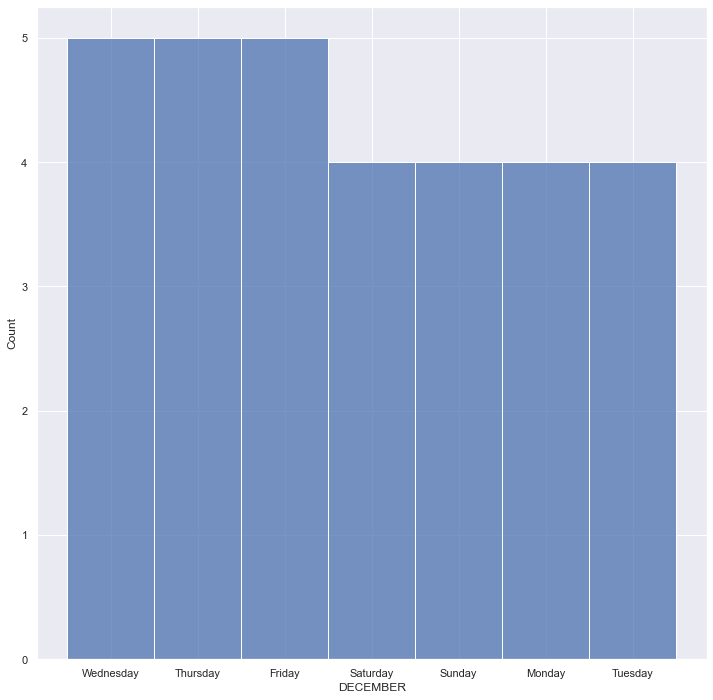

In [9]:
plt.figure(figsize=(12,12))
sns.histplot(df['DECEMBER'])

<AxesSubplot:xlabel='DEEP SLEEP', ylabel='Count'>

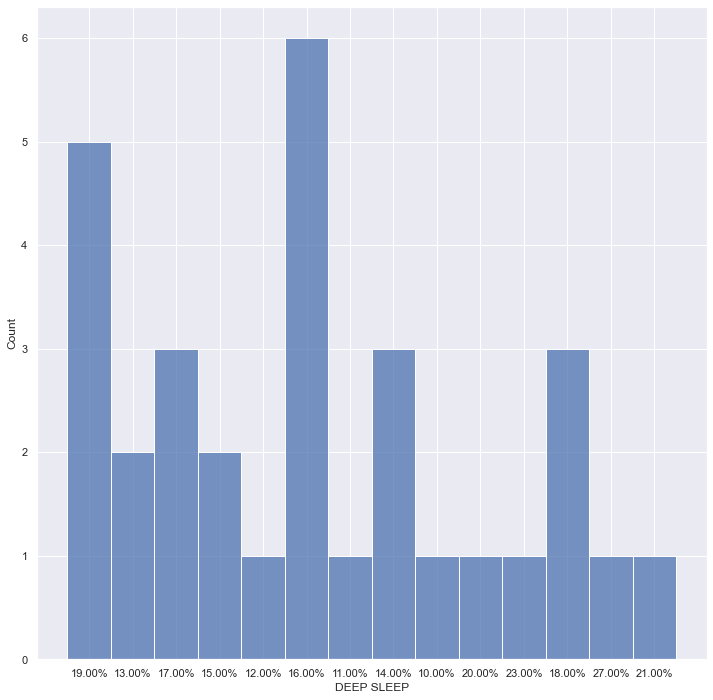

In [10]:
plt.figure(figsize=(12,12))
sns.histplot(df['DEEP SLEEP'])

In [11]:
# Minimum Deep sleep 
df[df['DEEP SLEEP']=='10.00%']

,DECEMBER,DATE,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME
11,Saturday,12/11/2021,78.0,7:57:00,13.00%,10.00%,45.00%,11:44pm - 9:05am


In [12]:
# Maximum Deep Sleep
df[df['DEEP SLEEP']=='27.00%']

,DECEMBER,DATE,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME
26,Sunday,12/26/2021,91.0,7:51:00,21.00%,27.00%,83.00%,12:14am - 9:08am


In [13]:
df['REM SLEEP'].min()
df[df['REM SLEEP']=='12.00%']

,DECEMBER,DATE,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME
9,Thursday,12/09/2021,85.0,7:32:00,12.00%,14.00%,96.00%,10:47pm - 7:27am
14,Tuesday,12/14/2021,83.0,7:33:00,12.00%,20.00%,76.00%,11:19pm - 7:54am
24,Friday,12/24/2021,78.0,9:03:00,12.00%,18.00%,52.00%,11:20pm - 9:56am


In [14]:
df['REM SLEEP'].max()
df[df['REM SLEEP']=='29.00%']

,DECEMBER,DATE,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME
19,Sunday,12/19/2021,83.0,7:08:00,29.00%,17.00%,65.00%,11:57pm - 7:57am


In [15]:
# Minimum heart rate below resting
df[df['HEART RATE BELOW RESTING']=='0.00%']

,DECEMBER,DATE,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME
16,Thursday,12/16/2021,74.0,6:34:00,16.00%,23.00%,0.00%,12:38am - 8:18am


In [16]:
df.corr()

,SLEEP SCORE
SLEEP SCORE,1.0


In [17]:
df

,DECEMBER,DATE,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME
1,Wednesday,12/01/2021,91.0,7:33:00,23.00%,19.00%,98.00%,10:56pm - 7:20am
2,Thursday,12/02/2021,81.0,7:17:00,16.00%,13.00%,94.00%,10:45pm - 6:58am
3,Friday,12/03/2021,80.0,7:17:00,15.00%,17.00%,78.00%,10:51pm - 7:02am
4,Saturday,12/04/2021,85.0,8:23:00,20.00%,15.00%,58.00%,9:53pm - 7:17am
5,Sunday,12/05/2021,82.0,7:19:00,20.00%,12.00%,79.00%,11:54pm - 8:16am
6,Monday,12/06/2021,80.0,7:18:00,18.00%,16.00%,56.00%,11:28pm - 7:47am
7,Tuesday,12/07/2021,89.0,8:02:00,21.00%,11.00%,94.00%,10:09pm - 7:18am
8,Wednesday,12/08/2021,85.0,6:47:00,22.00%,16.00%,94.00%,11:40pm - 7:33
9,Thursday,12/09/2021,85.0,7:32:00,12.00%,14.00%,96.00%,10:47pm - 7:27am
10,Friday,12/10/2021,87.0,7:45:00,20.00%,13.00%,75.00%,10:27pm - 7:07am


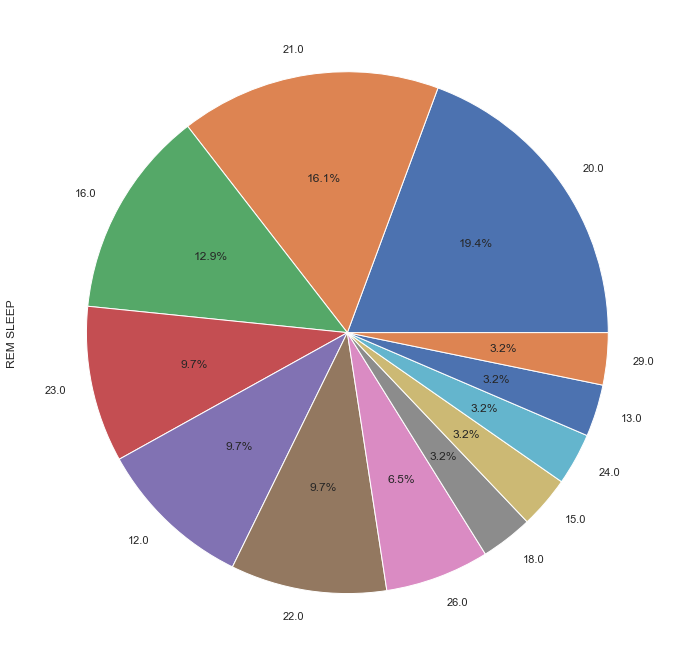

In [57]:
plt.figure(figsize=(12,12))
qe=df['REM SLEEP'].value_counts()
qe.plot.pie(autopct="%.1f%%");

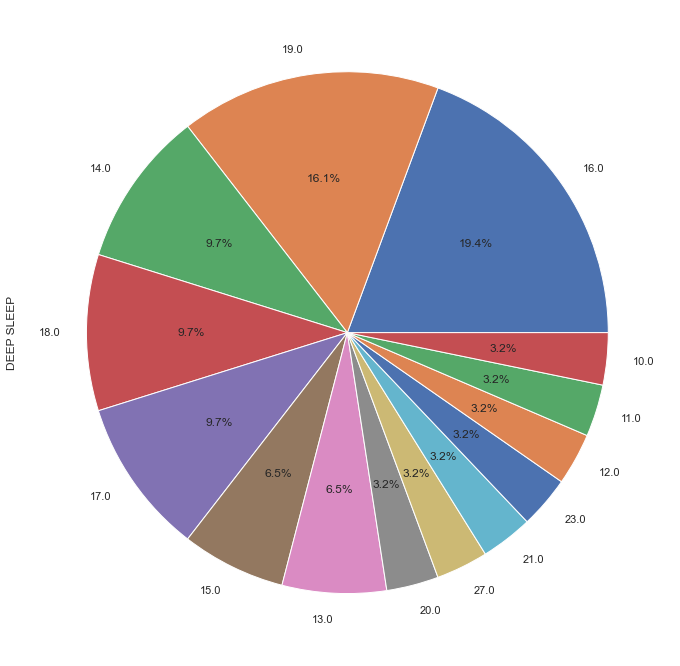

In [58]:
plt.figure(figsize=(12,12))
qe=df['DEEP SLEEP'].value_counts()
qe.plot.pie(autopct="%.1f%%");

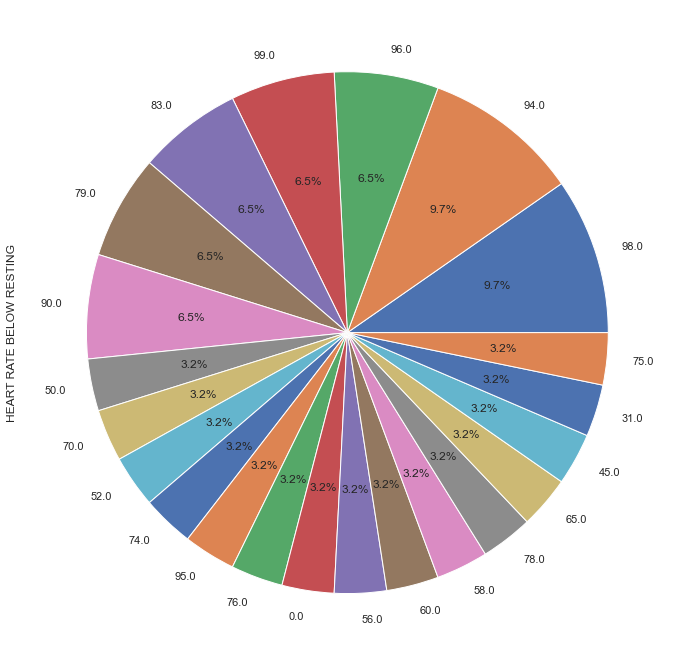

In [59]:

plt.figure(figsize=(12,12))
qe=df['HEART RATE BELOW RESTING'].value_counts()
qe.plot.pie(autopct="%.1f%%");

In [18]:
df['REM SLEEP']=df['REM SLEEP'].apply(lambda x:x.replace('%',''))

<ipython-input-18-808f1a79d4d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['REM SLEEP']=df['REM SLEEP'].apply(lambda x:x.replace('%',''))


In [19]:
df['DEEP SLEEP']=df['DEEP SLEEP'].apply(lambda x:x.replace('%',''))


<ipython-input-19-38f876d2b29e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DEEP SLEEP']=df['DEEP SLEEP'].apply(lambda x:x.replace('%',''))


In [20]:
df['HEART RATE BELOW RESTING']=df['HEART RATE BELOW RESTING'].apply(lambda x:x.replace('%',''))

<ipython-input-20-dee9690d64fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HEART RATE BELOW RESTING']=df['HEART RATE BELOW RESTING'].apply(lambda x:x.replace('%',''))


<Figure size 1080x1080 with 0 Axes>

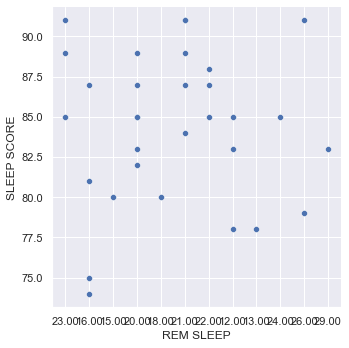

In [21]:
plt.figure(figsize=(15,15))
sns.relplot(x='REM SLEEP',y='SLEEP SCORE',data=df)

In [22]:
df.columns

Index(['DECEMBER', 'DATE', 'SLEEP SCORE', 'HOURS OF SLEEP', 'REM SLEEP',
       'DEEP SLEEP', 'HEART RATE BELOW RESTING', 'SLEEP TIME'],
      dtype='object')

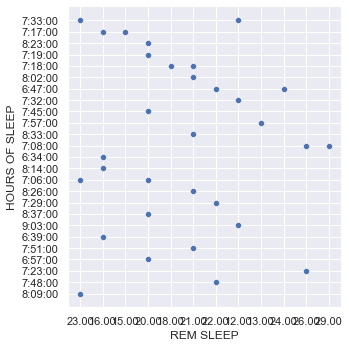

In [23]:

sns.relplot(x='REM SLEEP',y='HOURS OF SLEEP',data=df)

In [24]:
df

,DECEMBER,DATE,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME
1,Wednesday,12/01/2021,91.0,7:33:00,23.00,19.00,98.00,10:56pm - 7:20am
2,Thursday,12/02/2021,81.0,7:17:00,16.00,13.00,94.00,10:45pm - 6:58am
3,Friday,12/03/2021,80.0,7:17:00,15.00,17.00,78.00,10:51pm - 7:02am
4,Saturday,12/04/2021,85.0,8:23:00,20.00,15.00,58.00,9:53pm - 7:17am
5,Sunday,12/05/2021,82.0,7:19:00,20.00,12.00,79.00,11:54pm - 8:16am
6,Monday,12/06/2021,80.0,7:18:00,18.00,16.00,56.00,11:28pm - 7:47am
7,Tuesday,12/07/2021,89.0,8:02:00,21.00,11.00,94.00,10:09pm - 7:18am
8,Wednesday,12/08/2021,85.0,6:47:00,22.00,16.00,94.00,11:40pm - 7:33
9,Thursday,12/09/2021,85.0,7:32:00,12.00,14.00,96.00,10:47pm - 7:27am
10,Friday,12/10/2021,87.0,7:45:00,20.00,13.00,75.00,10:27pm - 7:07am


In [25]:
df['REM SLEEP']=df['REM SLEEP'].astype(float)

<ipython-input-25-4fbbd846e9a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['REM SLEEP']=df['REM SLEEP'].astype(float)


In [26]:
df['DEEP SLEEP']=df['DEEP SLEEP'].astype(float)

<ipython-input-26-0356151d52e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DEEP SLEEP']=df['DEEP SLEEP'].astype(float)


In [27]:
df['HEART RATE BELOW RESTING']=df['HEART RATE BELOW RESTING'].astype(float)

<ipython-input-27-bdedb7e365a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HEART RATE BELOW RESTING']=df['HEART RATE BELOW RESTING'].astype(float)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 1 to 31
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DECEMBER                  31 non-null     object 
 1   DATE                      31 non-null     object 
 2   SLEEP SCORE               31 non-null     float64
 3   HOURS OF SLEEP            31 non-null     object 
 4   REM SLEEP                 31 non-null     float64
 5   DEEP SLEEP                31 non-null     float64
 6   HEART RATE BELOW RESTING  31 non-null     float64
 7   SLEEP TIME                31 non-null     object 
dtypes: float64(4), object(4)
memory usage: 3.2+ KB


<AxesSubplot:>

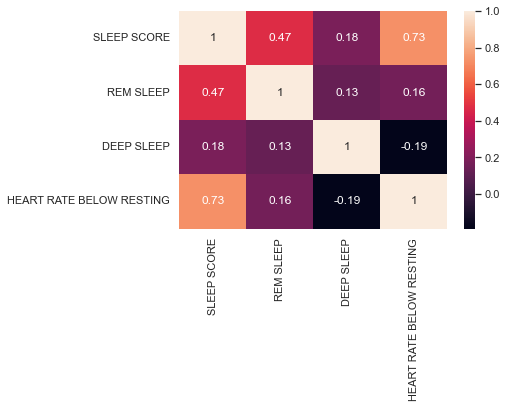

In [29]:
sns.heatmap(df.corr(),annot=True)

# for machine learning model

In [30]:
df.columns

Index(['DECEMBER', 'DATE', 'SLEEP SCORE', 'HOURS OF SLEEP', 'REM SLEEP',
       'DEEP SLEEP', 'HEART RATE BELOW RESTING', 'SLEEP TIME'],
      dtype='object')

In [31]:
df=df.drop(columns=['DECEMBER', 'DATE','HOURS OF SLEEP','SLEEP TIME'])

In [32]:
df

,SLEEP SCORE,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING
1,91.0,23.0,19.0,98.0
2,81.0,16.0,13.0,94.0
3,80.0,15.0,17.0,78.0
4,85.0,20.0,15.0,58.0
5,82.0,20.0,12.0,79.0
6,80.0,18.0,16.0,56.0
7,89.0,21.0,11.0,94.0
8,85.0,22.0,16.0,94.0
9,85.0,12.0,14.0,96.0
10,87.0,20.0,13.0,75.0


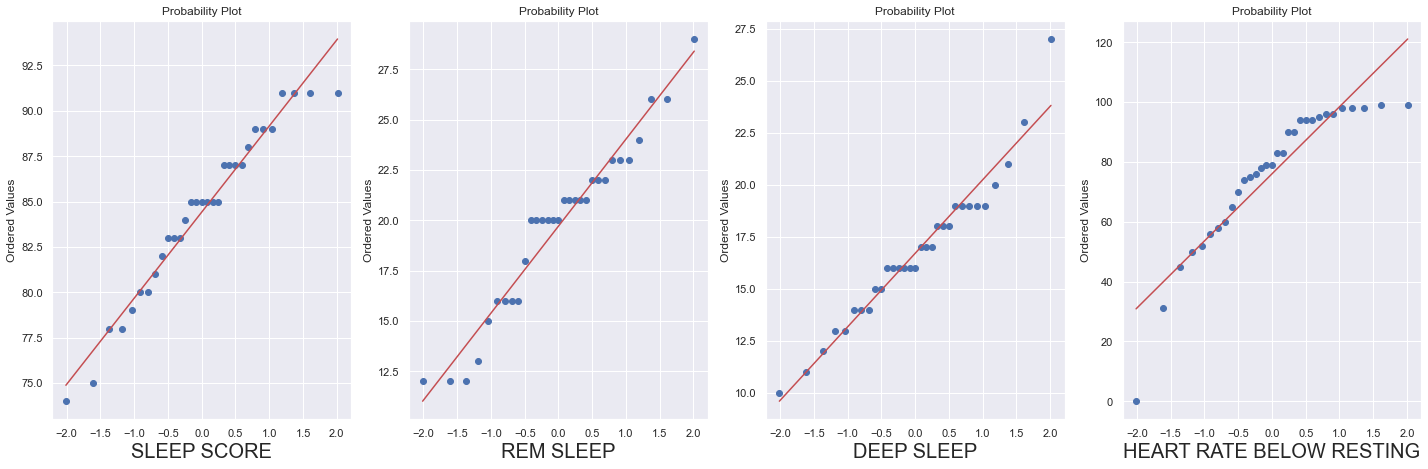

In [33]:
plt.figure(figsize=(20,25),facecolor='white')
a=1
for i in df:
    if(a<=4):
        ax=plt.subplot(4,4,a)
        stats.probplot(df[i],dist='norm',plot=pylab)        
        plt.xlabel(i,fontsize=20)
    a=a+1
plt.tight_layout()    
        

In [34]:
X=df[['HEART RATE BELOW RESTING']]
Y=df[['SLEEP SCORE']]

In [35]:
X

,HEART RATE BELOW RESTING
1,98.0
2,94.0
3,78.0
4,58.0
5,79.0
6,56.0
7,94.0
8,94.0
9,96.0
10,75.0


In [36]:
Y

,SLEEP SCORE
1,91.0
2,81.0
3,80.0
4,85.0
5,82.0
6,80.0
7,89.0
8,85.0
9,85.0
10,87.0


In [37]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [38]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.25,random_state=880)

In [39]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
# print intercept and coefficients(slope)
print(lm.intercept_)
print(lm.coef_)

[84.46349179]
[[3.51524325]]


In [40]:
lm.score(x_test,y_test)

0.8351433600808007

In [41]:
def adj_r2(x,y):
    r2=lm.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [42]:
adj_r2(x_test,y_test)

0.8076672534276008

In [43]:
y_pred=lm.predict(x_test)

In [44]:
print('MSE: ',mean_squared_error(y_test,y_pred))
print('MAPE: ',mean_absolute_percentage_error(y_test, y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))

MSE:  4.057018873011545
MAPE:  0.022399059420153425
MAE:  1.8883294009322675


In [45]:
df.skew()

SLEEP SCORE                -0.476212
REM SLEEP                  -0.211164
DEEP SLEEP                  0.633941
HEART RATE BELOW RESTING   -1.423106
dtype: float64

# Multilinear Regression

In [46]:
X=df.drop(columns='SLEEP SCORE')
Y=df[['SLEEP SCORE']]

In [47]:
X

,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING
1,23.0,19.0,98.0
2,16.0,13.0,94.0
3,15.0,17.0,78.0
4,20.0,15.0,58.0
5,20.0,12.0,79.0
6,18.0,16.0,56.0
7,21.0,11.0,94.0
8,22.0,16.0,94.0
9,12.0,14.0,96.0
10,20.0,13.0,75.0


In [48]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [49]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.25,random_state=333)

In [50]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
# print intercept and coefficients(slope)
print(lm.intercept_)
print(lm.coef_)

[84.78556896]
[[0.99224682 1.2420591  2.96892187]]


In [51]:
lm.score(x_test,y_test)

0.71780133646326

In [52]:
def adj_r2(x,y):
    r2=lm.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [53]:
adj_r2(x_test,y_test)

0.5061523388107051

In [54]:
y_pred=lm.predict(x_test)

In [55]:
print('MSE: ',mean_squared_error(y_test,y_pred))
print('MAPE: ',mean_absolute_percentage_error(y_test, y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))

MSE:  9.5903452061314
MAPE:  0.03429342399050687
MAE:  2.768430038524045
